##  Intel Image Classification Using Fastai 

In this notebook we will build an image classfier for classification of images from [Intel-Image-Classification](https://www.kaggle.com/puneet6060/intel-image-classification) dataset using [fastai](https://www.fast.ai/) library



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/intel-image-classification/seg_test/seg_test/sea/21568.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/23495.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/24001.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/24158.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/21406.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/22478.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/22066.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/22718.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/20882.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/22441.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/23124.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/22186.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/sea/20099.jpg
/kaggle/input/intel-image-classification/seg_test/s

/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21230.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/22727.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20603.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21842.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23661.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20844.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20109.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23676.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21861.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/22742.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20680.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20249.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23027.jpg

/kaggle/input/intel-image-classification/seg_pred/seg_pred/23083.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/9786.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/13498.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/21493.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/10048.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/14395.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/10844.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/3846.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/5336.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/21003.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/1997.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/6846.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/22984.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/18278.jpg
/kaggle/input/intel-image-classificatio

/kaggle/input/intel-image-classification/seg_pred/seg_pred/12631.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/8578.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/1468.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/20043.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/13778.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/7511.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/20839.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/21938.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/7768.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/2640.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/18069.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/11897.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/3228.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/15161.jpg
/kaggle/input/intel-image-classification

/kaggle/input/intel-image-classification/seg_pred/seg_pred/6198.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/667.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/2966.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/8068.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/3464.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/13518.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/16859.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/13316.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/12325.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/9973.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/20032.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/15723.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/9889.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/17159.jpg
/kaggle/input/intel-image-classification/s

/kaggle/input/intel-image-classification/seg_pred/seg_pred/23777.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/17901.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/11324.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/7305.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/22211.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/8123.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/18021.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/22566.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/22972.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/9235.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/17863.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/11674.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/3696.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/7405.jpg
/kaggle/input/intel-image-classificatio

/kaggle/input/intel-image-classification/seg_train/seg_train/sea/1675.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/2409.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/20000.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/19081.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/15581.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/14469.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/13685.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/5703.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/10883.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/18444.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/15020.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/18730.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/2036.jpg
/kaggle/input/intel-image-cla

/kaggle/input/intel-image-classification/seg_train/seg_train/sea/2617.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/13272.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/18878.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/8214.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/14741.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/16495.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/670.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/15003.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/3196.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/19282.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/17291.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/12479.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/sea/7728.jpg
/kaggle/input/intel-image-class

/kaggle/input/intel-image-classification/seg_train/seg_train/forest/1105.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/14338.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/5872.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/9450.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/19210.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/19849.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/14174.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/9116.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/12388.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/9025.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/13164.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/6896.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/forest/16

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6601.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12337.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12829.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/5886.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/11340.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12848.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12177.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/7960.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15204.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/9644.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/820.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/5836.jpg
/kaggle/input/intel-image-classification/seg_tr

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/13105.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/11637.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12081.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/8883.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15430.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10581.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/18122.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/13067.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17435.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/11487.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14529.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/19024.jpg
/kaggle/input/intel-image-classification/

/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/15074.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/13915.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/19005.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/697.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/4725.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/11333.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/17257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/2511.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/14087.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/19465.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/2280.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/10903.jpg
/kaggle/input/intel-image-classification/seg_train/seg_tr

/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/2098.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/7580.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/11646.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/18819.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/17736.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/10353.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/6409.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/7716.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/19975.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/9919.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/15996.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/19252.jpg
/kaggle/input/intel-image-classification/seg_train/seg_tr

/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/230.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/1220.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/17272.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/11345.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/6673.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/11306.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/9032.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/7262.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/14231.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/495.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/1196.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/7471.jpg
/kaggle/input/intel-image-classificati

/kaggle/input/intel-image-classification/seg_train/seg_train/street/8021.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/19450.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/18487.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/15883.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/7254.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/14628.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/5131.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/18644.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/15494.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/15898.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/562.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/5684.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/11

/kaggle/input/intel-image-classification/seg_train/seg_train/street/17555.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/14585.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/14905.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/7293.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/12633.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/1270.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/12415.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/3760.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/3079.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/2881.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/10222.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/511.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/street/788

In [2]:
## importing all the libraries 
## here we will be building our model using fastai library

from fastai.vision import *

### Setting the path to our train data	

In [3]:
path = Path('../input/intel-image-classification/seg_train/seg_train/')  ## setting the path to the train images
path.ls()


[PosixPath('../input/intel-image-classification/seg_train/seg_train/sea'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/forest'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/mountain'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/glacier'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/buildings'),
 PosixPath('../input/intel-image-classification/seg_train/seg_train/street')]


### checking whether the dataset contains any image that can't be read, if so then delete it.

In [4]:
classes =['glacier','sea','forest','street','mountain','buildings']  ## deifining labels of the images

for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

glacier


sea


forest


street


mountain


buildings


### we can see that there are no bad images in our dataset

## View Data

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
## here using ImageDataBunch object we are splitting data in to valid_pct and normalizing the images

In [6]:
data.classes   ## printing the classes of our dataset

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

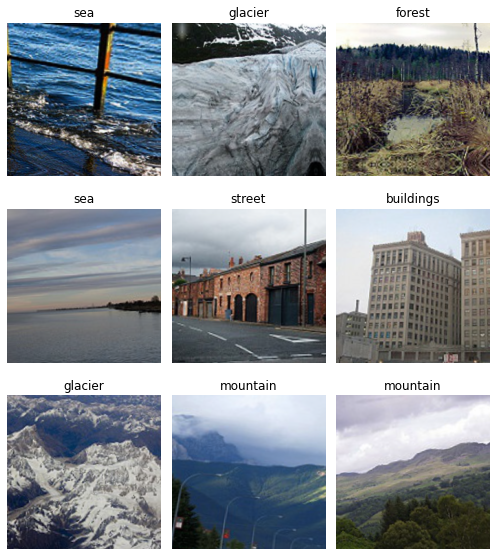

In [7]:
data.show_batch(rows=3,figsize=(7,8))  ## viewing our data images

In [8]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
 6,
 11228,
 2806)

### here we can see that , we have 6 classes , having 11228 images in training set and 2806 images in validation set

# Training the Model

In [9]:
model = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.542681,0.317609,0.105488,01:35
1,0.375593,0.245197,0.088026,01:34
2,0.285966,0.221832,0.074127,01:33
3,0.244116,0.204898,0.069494,01:36
4,0.211629,0.205671,0.067712,01:35


### we can see that at the end of 5 epochs we managed to get an error_rate of just around 6% ⇒this is quite awesome !!!!!

In [11]:
model.model_dir ="/tmp/model/"



In [12]:
model.save('version-1')

#### here we are storing our model in the 'tmp/model/'  which is a writeable directory in kaggle working

In [13]:
model.unfreeze()

In [14]:
model.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


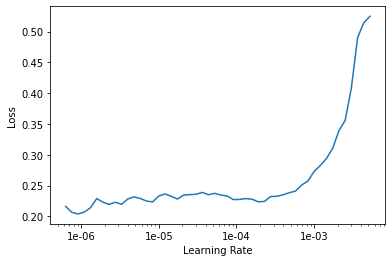

In [15]:
model.recorder.plot()

#### choosing learning rate between 1e-05 and 1e-04

In [28]:
model.fit_one_cycle(2,max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.301558,0.214053,0.070919,01:35
1,0.173219,0.167923,0.054170,01:35


In [18]:
model.save("version 1.1")

In [19]:
interpret = ClassificationInterpretation.from_learner(model)

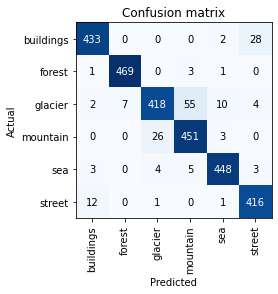

In [20]:
interpret.plot_confusion_matrix()

In [21]:
losess,idxs = interpret.top_losses()


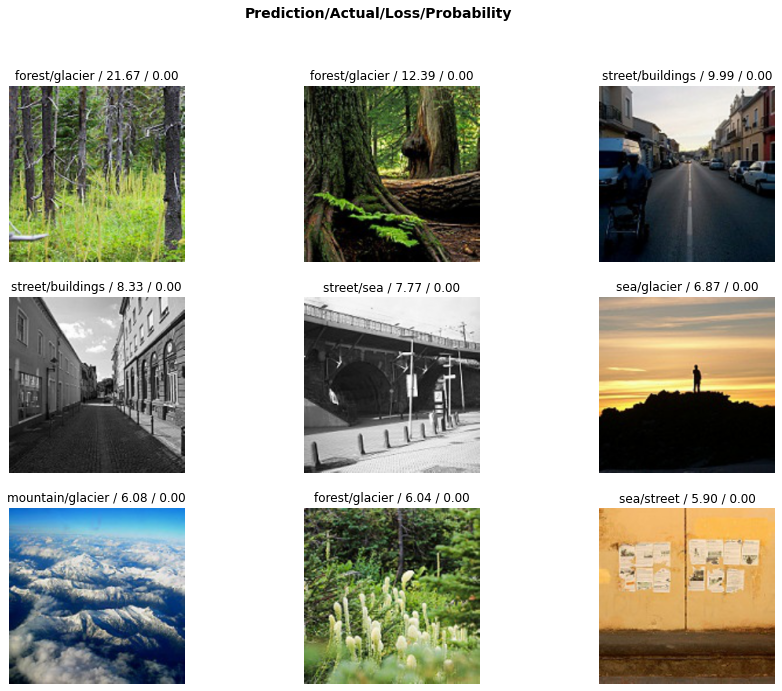

In [22]:
interpret.plot_top_losses(9,figsize=(15,11))  ### these are some of our wrongly classified images

In [23]:
interpret.most_confused(min_val=5)   ## seeingw which were badly predictied

[('glacier', 'mountain', 55),
 ('buildings', 'street', 28),
 ('mountain', 'glacier', 26),
 ('street', 'buildings', 12),
 ('glacier', 'sea', 10),
 ('glacier', 'forest', 7),
 ('sea', 'mountain', 5)]

### here we can see that glaciers were classified as mountains almost 55 times , hence these all are our top wrong predictions with number of bad predictions

## now we can test our model on few images

(Category sea, tensor(4), tensor([1.0270e-07, 7.3956e-08, 1.0693e-05, 5.2944e-07, 9.9999e-01, 2.8298e-09]))


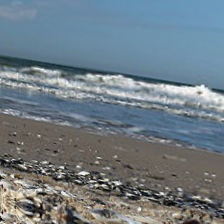

In [24]:
test_img = model.data.train_ds[0][0]
print(model.predict(test_img))

data.train_ds[0][0]



(Category forest, tensor(1), tensor([5.6870e-10, 1.0000e+00, 5.3610e-10, 2.1099e-08, 5.8497e-09, 1.9115e-10]))


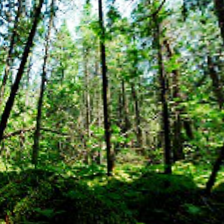

In [26]:
test_img = data.train_ds[3213][0]
print(model.predict(test_img))

data.train_ds[3213][0]


(Category glacier, tensor(2), tensor([1.7513e-06, 2.3541e-06, 9.9927e-01, 7.1435e-04, 3.5555e-06, 8.8476e-06]))


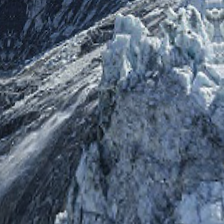

In [27]:
test_img = data.train_ds[6378][0]
print(model.predict(test_img))

data.train_ds[6378][0]



#### So this was the whole process of creating a classification model using fastai library.
